In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Documentação da Tabela de Séries

## Descrição das Colunas

| Coluna               | Tipo de Dados | Descrição                                                                                                                                 |
|----------------------|---------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| `series_animedb_id`  | Inteiro       | Identificação única da série no banco de dados.                                                                                           |
| `series_title`       | Texto         | Título da série.                                                                                                                          |
| `series_type`        | Texto         | Tipo da série (TV, OVA, Filme, etc.).                                                                                                     |
| `series_episodes`    | Inteiro       | Número total de episódios da série.                                                                                                       |
| `my_id`              | Inteiro       | Identificação única da série.                                                                                                           |
| `my_watched_episodes`| Inteiro       | Número de episódios assistidos pelo usuário.                                                                                              |
| `my_start_date`      | Data          | Data em que o usuário começou a assistir a série.                                                                                         |
| `my_finish_date`     | Data          | Data em que o usuário terminou de assistir a série (se aplicável).                                                                        |
| `my_rated`           | Inteiro       | Indicador de avaliação pelo usuário (0 para não avaliado, 1 para avaliado).                                                               |
| `my_score`           | Inteiro       | Nota atribuída pelo usuário à série (0-10).                                                                                               |
| `my_storage`         | Texto         | Tipo de armazenamento da série (se está salvo localmente ou em outro tipo de mídia).                                                      |
| `my_storage_value`   | Inteiro       | Valor associado ao armazenamento (0 para inexistente, 1 para presente).                                                                   |
| `my_status`          | Texto         | Status atual da série para o usuário (Ex: "Completed", "Watching").                                                                       |
| `my_comments`        | Texto         | Comentários pessoais do usuário sobre a série.                                                                                            |
| `my_times_watched`   | Inteiro       | Número de vezes que o usuário assistiu a série novamente.                                                                                 |
| `my_rewatch_value`   | Inteiro       | Valor de rewatch atribuído pelo usuário (1 para sim, 0 para não).                                                                         |
| `my_priority`        | Texto         | Prioridade atribuída à série (LOW, MEDIUM, HIGH).                                                                                         |
| `my_tags`            | Texto         | Tags associadas à série pelo usuário.                                                                                                     |
| `my_rewatching`      | Inteiro       | Indicador se o usuário está reassistindo a série (1 para sim, 0 para não).                                                                |
| `my_rewatching_ep`   | Inteiro       | Número de episódios assistidos durante o rewatch.                                                                                         |
| `my_discuss`         | Texto         | Discussão ou tópicos relacionados à série.                                                                                                |
| `my_sns`             | Texto         | SNS ou rede social associada à série (por exemplo, plataforma de discussão).                                                              |
| `update_on_import`   | Inteiro       | Indicador se os dados devem ser atualizados na importação (1 para sim, 0 para não).                                                       |

### Exemplo de Entrada:

| series_animedb_id | series_title                          | series_type | series_episodes | my_id | my_watched_episodes | my_start_date | my_finish_date | my_rated | my_score | my_storage | my_storage_value | my_status  | my_comments                                                                                           | my_times_watched | my_rewatch_value | my_priority | my_tags   | my_rewatching | my_rewatching_ep | my_discuss | my_sns   | update_on_import |
|-------------------|---------------------------------------|-------------|-----------------|-------|---------------------|---------------|----------------|----------|----------|------------|------------------|------------|--------------------------------------------------------------------------------------------------------|------------------|------------------|-------------|-----------|---------------|------------------|------------|----------|------------------|
| 52034             | "Oshi no Ko"                          | TV          | 11              | 0     | 11                  | 2023-04-12    | 2023-06-28     |          | 1        |            | 0                | Completed  | 🥈: Indiscutivelmente bem produzido, porém raso em conteúdo.                                           | 0                | 0                | LOW         | 🥈        | 0             | 1                | default    | 0        |                  |
| 55791             | "Oshi no Ko" 2nd Season               | TV          | 13              | 0     | 9                   | 2024-07-03    | 0000-00-00     |          | 6        |            | 0                | Watching   |                                                                                                | 0                | 0                | LOW         |           | 0             | 1                | default    | 0        |                  |
| 1583              | 009-1                                 | TV          | 12              | 0     | 12                  | 2024-01-23    | 2024-01-26     |          | 4        |            | 0                | Completed  | Poderia resumir bastante e dizer que ele é simplesmente desinteressante.                                | 0                | 0                | LOW         |           | 0             | 1                | default    | 0        |                  |




In [12]:
leitura = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/animelist.csv')
leitura.head(11)

,series_animedb_id,series_title,series_type,series_episodes,my_id,my_watched_episodes,my_start_date,my_finish_date,my_rated,my_score,...,my_comments,my_times_watched,my_rewatch_value,my_priority,my_tags,my_rewatching,my_rewatching_ep,my_discuss,my_sns,update_on_import
0,52034,"""Oshi no Ko""",TV,11,0,11,2023-04-12,2023-06-28,NaN,1,...,NaN,0,NaN,LOW,"🥈: Indiscutivelmente bem produzido, porém raso...",0,0,1,default,0
1,55791,"""Oshi no Ko"" 2nd Season",TV,13,0,9,2024-07-03,0000-00-00,NaN,6,...,NaN,0,NaN,LOW,NaN,0,0,1,default,0
2,1583,009-1,TV,12,0,12,2024-01-23,2024-01-26,NaN,4,...,NaN,0,NaN,LOW,Poderia resumir bastante e dizer que ele é sim...,0,0,1,default,0
3,41380,100-man no Inochi no Ue ni Ore wa Tatteiru,TV,12,0,12,2022-01-18,2022-01-19,NaN,2,...,NaN,0,NaN,LOW,O monólogo do final é tão patético quanto os o...,0,0,1,default,0
4,44881,100-man no Inochi no Ue ni Ore wa Tatteiru 2nd...,TV,12,0,12,2022-01-19,2022-01-20,NaN,2,...,NaN,0,NaN,LOW,"Protagonista com complexo de Deus, a personage...",0,0,1,default,0
5,31646,3-gatsu no Lion,TV,22,0,22,2022-05-15,2022-05-19,NaN,9,...,NaN,0,NaN,LOW,"🥈: O suco do anime de esporte, um desenvolvime...",0,0,1,default,0
6,35180,3-gatsu no Lion 2nd Season,TV,22,0,22,2023-07-08,2023-07-10,NaN,10,...,NaN,0,NaN,LOW,"💎: Estava muito em dúvida em que nota dar, tan...",0,0,1,default,0
7,55973,30-sai made Doutei dato Mahoutsukai ni Nareru ...,TV,12,0,12,2024-01-10,2024-03-27,NaN,3,...,NaN,0,NaN,LOW,A premissa não me pegou muito desde o princípi...,0,0,1,default,0
8,51464,4-nin wa Sorezore Uso wo Tsuku,TV,11,0,11,2022-10-15,2022-12-24,NaN,6,...,NaN,0,NaN,LOW,"Meio Sus, a melhor parte de longe é a do meio,...",0,0,1,default,0
9,38101,5-toubun no Hanayome,TV,12,0,12,0000-00-00,0000-00-00,NaN,5,...,NaN,0,NaN,LOW,"Tem o seu valor, principalmente pelo fator das...",0,0,1,default,0


In [13]:
probcomplete = len(animelist[animelist['my_status']== 'Completed']) / len(animelist)

In [14]:
print('A probabilidade do anime estar completo é igual a: '+ str(round(probcomplete*100,2)) + '%')

A probabilidade do anime estar completo é igual a: 94.03%


In [15]:
probwatching = len(animelist[animelist['my_status']== 'Watching']) / len(animelist)

In [16]:
print('A probabilidade do anime estar completo é igual a: '+ str(round(probwatching*100,2)) + '%')

A probabilidade do anime estar completo é igual a: 1.99%


In [17]:
probdropped = len(animelist[animelist['my_status']== 'Dropped']) / len(animelist)

In [18]:
print('A probabilidade do anime estar completo é igual a: '+ str(round(probdropped*100,2)) + '%')

A probabilidade do anime estar completo é igual a: 0.84%


In [19]:
agrupamento = animelist['my_status'].value_counts()
agrupamento

,count
my_status,
Completed,897
Watching,19
Plan to Watch,16
On-Hold,14
Dropped,8


<Axes: ylabel='count'>

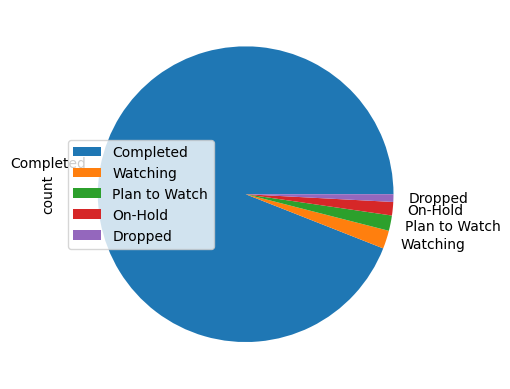

In [20]:
agrupamento.plot.pie(legend = True)

In [23]:
notas = animelist['my_score'].value_counts().reset_index()
notas.columns = ['Nota', 'Quantidade']
notas

,Nota,Quantidade
0,3,135
1,6,115
2,2,113
3,5,113
4,4,112
5,7,103
6,8,88
7,9,76
8,1,39
9,0,38


<Axes: >

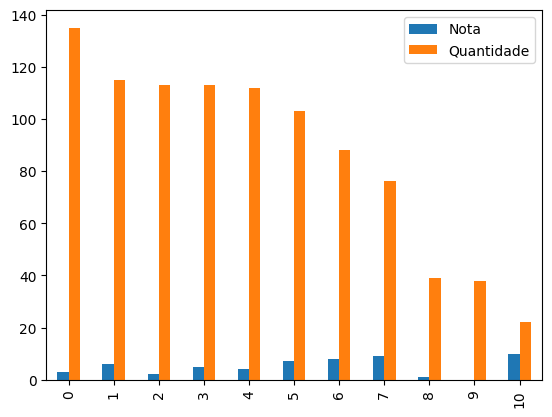

In [24]:
notas.plot.bar(legend = True)

<Axes: ylabel='count'>

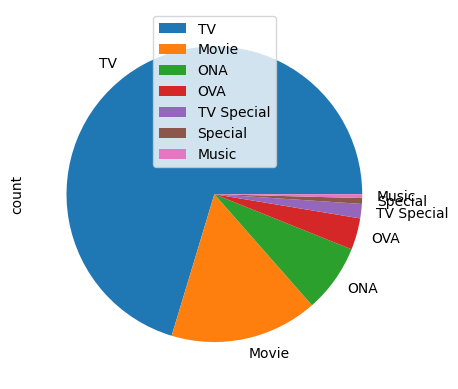

In [25]:
tipo = animelist['series_type'].value_counts()
tipo.plot.pie(legend = True)